# Анализ отзывов клиентов банка (Тональность и Тематика)

Описание проекта:
Этот проект посвящен анализу тональности текстовых отзывов о банковских услугах.  
**Цель проекта** — классифицировать отзывы как положительные или отрицательные, а также сегментировать основные темы отзывов. Для анализа использованы методы обработки естественного языка (NLP) и машинного обучения, включая классификацию текста и тематическое моделирование.

Шаги выполнения проекта:

# 1. Загрузка и подготовка данных

Датасет: Determining the Sentiment of Bank Reviews Dataset, Kaggle
https://www.kaggle.com/datasets/egorandreasyan/determining-the-sentiment-of-bank-reviews-dataset

Этот датасет содержит текстовые отзывы клиентов банка с метками тональности (положительные/отрицательные).

# 2. Предварительная обработка данных

 2.1. Приведение текста к нижнему регистру.  
 2.2. Удаление спецсимволов, цифр и лишних пробелов.  
 2.3. Удаление стоп-слов для улучшения качества текста.  

# 3. Преобразование текста в числовые данные

Для преобразования текста в числовые векторы использовался метод TF-IDF (Term Frequency-Inverse Document Frequency), который позволяет оценить важность каждого слова в контексте документа.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 4. Обучение модели машинного обучения

Для классификации текста использован алгоритм Naive Bayes. Это один из классических методов для работы с текстовыми данными. Модель обучена на тренировочных данных, а затем оценена на тестовых.

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

**Предсказания**
y_pred = model.predict(X_test_tfidf)

**Оценка модели**
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 5. Самостоятельный анализ тональности



# 6. Выделение ключевых тем (Topic Modeling)

Для выделения ключевых тем можно использовать Latent Dirichlet Allocation (LDA) — популярную модель для тематического моделирования. Эта модель позволяет выявить скрытые темы в текстах.


----------------------------------------------------------------------

# 1. Загрузка и подготовка данных
Датасет: Determining the Sentiment of Bank Reviews Dataset, Kaggle https://www.kaggle.com/datasets/egorandreasyan/determining-the-sentiment-of-bank-reviews-dataset

Этот датасет содержит текстовые отзывы клиентов банка с метками тональности (положительные/отрицательные).

In [2]:
import pandas as pd
reviews = pd.read_csv('determining_the_sentiment_of_bank_reviews_dataset/train.csv', sep='\t')
reviews = pd.DataFrame(reviews)
display(reviews.head())
reviews.info()

,idx,Score,Text
0,0,Positive,В Альфа-Банке работает замечательная девушка -...
1,1,Negative,Оформляя рассрочку в м. Видео в меге тёплый ст...
2,2,Positive,Очень порадовала оперативность работы в банке....
3,3,Negative,Имела неосторожность оформить потреб. кредит в...
4,4,Negative,Небольшая предыстория: Нашел на сайте MDM банк...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13999 entries, 0 to 13998
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   idx     13999 non-null  int64 
 1   Score   13999 non-null  object
 2   Text    13999 non-null  object
dtypes: int64(1), object(2)
memory usage: 328.2+ KB


# 2. Предварительная обработка данных
2.1. Приведение текста к нижнему регистру.  
2.2. Удаление спецсимволов, цифр и лишних пробелов.  
2.3. Удаление стоп-слов для улучшения качества текста.  

In [3]:
!pip install pymorphy2

     |████████████████████████████████| 55 kB 1.1 MB/s eta 0:00:011
     |████████████████████████████████| 8.2 MB 2.4 MB/s eta 0:00:01
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=d5f34ebdb3f29843ec429232953437f2f458f8940932c8f01b3b13acb5dbe939
  Stored in directory: /Users/aborovkova/Library/Caches/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt


In [4]:
!pip install --upgrade pymorphy2

In [5]:
import nltk

In [6]:
import pymorphy2

In [7]:
from nltk.corpus import stopwords

In [8]:
# Загрузка стоп-слов для русского языка
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aborovkova/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
import sys
print(sys.version)

3.9.12 (main, Jun  1 2022, 06:34:44) 
[Clang 12.0.0 ]


In [11]:
# Инициализация морфологического анализатора для лемматизации
morph = pymorphy2.MorphAnalyzer()

In [12]:
# Просмотр первых строк
print(reviews.head())

   idx     Score                                               Text
0    0  Positive  В Альфа-Банке работает замечательная девушка -...
1    1  Negative  Оформляя рассрочку в м. Видео в меге тёплый ст...
2    2  Positive  Очень порадовала оперативность работы в банке....
3    3  Negative  Имела неосторожность оформить потреб. кредит в...
4    4  Negative  Небольшая предыстория: Нашел на сайте MDM банк...


In [13]:
# 2. Функция очистки текста

def clean_text(text):
    """
    Очистка текста:
    - Приведение к нижнему регистру
    - Удаление спецсимволов, цифр, лишних пробелов
    - Удаление стоп-слов
    - Лемматизация
    """
    if not isinstance(text, str):  # Проверка, что передан текст
        return ""

    text = text.lower()  # Приводим к нижнему регистру
    text = re.sub(r'[^а-яё\s]', '', text)  # Удаляем все, кроме русских букв и пробелов
    words = text.split()  # Разбиваем текст на слова
    words = [morph.parse(word)[0].normal_form for word in words if word not in stop_words]  # Лемматизация и удаление стоп-слов
    return " ".join(words)


In [14]:
!pip install swifter 

     |████████████████████████████████| 1.2 MB 1.6 MB/s eta 0:00:01
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16531 sha256=3ee6e5c316a73057ce2bf9321742e2f9e8c10863384ac943486e9a99a1e40f1f
  Stored in directory: /Users/aborovkova/Library/Caches/pip/wheels/7b/4a/7e/bcc48cf10e10fcf5b4dae464a66b523756db6b950e02129680
Successfully built swifter


In [15]:
import re

In [16]:
# 3. Применение очистки к данным
#import swifter # используем swifter для параллельного вычисления, иначе компьютер зависает
#reviews["clean_text"] = reviews["Text"].astype(str).swifter.apply(clean_text) 

#Просмотр результатов
#print(reviews[["Text", "clean_text"]].head())

In [17]:
# 4. Сохранение очищенного датасета
# reviews.to_csv("cleaned_reviews.csv", index=False)

In [18]:
# Загрузка столбца 'clean_text' из файла cleaned_reviews.csv
clean_text_data = pd.read_csv('cleaned_reviews.csv')
clean_text_data = pd.DataFrame(clean_text_data)
display(clean_text_data.head())

,idx,Score,Text,clean_text
0,0,Positive,В Альфа-Банке работает замечательная девушка -...,альфабанка работать замечательный девушка илья...
1,1,Negative,Оформляя рассрочку в м. Видео в меге тёплый ст...,оформлять рассрочка м видео мег тёплый стан по...
2,2,Positive,Очень порадовала оперативность работы в банке....,очень порадовать оперативность работа банк зак...
3,3,Negative,Имела неосторожность оформить потреб. кредит в...,иметь неосторожность оформить потреба кредит а...
4,4,Negative,Небольшая предыстория: Нашел на сайте MDM банк...,небольшой предыстория найти сайт банк интересн...


Результат:

 - Колонка clean_text содержит очищенные и лемматизированные отзывы.  
 - Теперь данные готовы для дальнейшего анализа, например, анализа тональности.  

In [19]:
# Добавление столбца 'clean_text' к существующему датафрейму reviews
reviews['clean_text'] = clean_text_data['clean_text']
# Проверяем 
display(reviews.head())
# Данные обработались корректно

,idx,Score,Text,clean_text
0,0,Positive,В Альфа-Банке работает замечательная девушка -...,альфабанка работать замечательный девушка илья...
1,1,Negative,Оформляя рассрочку в м. Видео в меге тёплый ст...,оформлять рассрочка м видео мег тёплый стан по...
2,2,Positive,Очень порадовала оперативность работы в банке....,очень порадовать оперативность работа банк зак...
3,3,Negative,Имела неосторожность оформить потреб. кредит в...,иметь неосторожность оформить потреба кредит а...
4,4,Negative,Небольшая предыстория: Нашел на сайте MDM банк...,небольшой предыстория найти сайт банк интересн...


# 3. Преобразование текста в числовые данные
Преобразуем очищенный текст в числовые векторы с помощью TF-IDF (Term Frequency-Inverse Document Frequency). Это позволит модели машинного обучения понимать текст как набор значимых признаков.

Выбрала TF-IDF, т.к. он прост в реалзиации и подходит для задачи. Ru-BERT занимает больше памяти.


In [20]:
# 1. Импорт библиотеки
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
# 2. Преобразование текста в TF-IDF

# Создаём объект TfidfVectorizer и применяем его к данным:

vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)  # Указываем макс. число признаков
tfidf_matrix = vectorizer.fit_transform(reviews["clean_text"])  # Преобразуем текст в матрицу чисел

In [22]:
# 3. Просмотр результатов

#Чтобы убедиться, что всё работает, посмотрим на полученную матрицу:

print(f"Размерность матрицы: {tfidf_matrix.shape}")  # Количество отзывов × количество признаков
print("Примеры признаков (слов):", vectorizer.get_feature_names_out()[:10])  # Выведем 10 самых частых слов

Размерность матрицы: (13999, 5000)
Примеры признаков (слов): ['аа' 'аба' 'абонент' 'абонентский' 'абсолют' 'абсолютбанк' 'абсолютно'
 'абсолютный' 'абсурд' 'абэ']


# 4. Обучение модели машинного обучения  
Мы будем использовать Naive Bayes (MultinomialNB), так как он хорошо подходит для задач классификации текста.  
• 80% данных — для обучения.  
• 20% данных — для тестирования.

In [23]:
# проверка на дублирование
print(f"Количество повторяющихся отзывов: {reviews.duplicated().sum()}")

Количество повторяющихся отзывов: 0


In [24]:
from sklearn.model_selection import train_test_split

# Разделение данных (20% - тест, 80% - обучение)
X_train, X_test, y_train, y_test = train_test_split(
tfidf_matrix, reviews["Score"], test_size=0.2, random_state=42, shuffle=True
) #shuffle=True (по умолчанию), чтобы данные перемешивались перед разделением

# проверка размеров выборок
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (11199, 5000)
Размер тестовой выборки: (2800, 5000)


In [25]:
# Преобразуем разреженные матрицы в плотные массивы
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Сравниваем строки (тексты) в выборках
common_texts = set(map(tuple, X_train_dense)).intersection(set(map(tuple, X_test_dense)))
print(f"Совпадающих текстов: {len(common_texts)}")

Совпадающих текстов: 0


Выборки разлины по объему, совпадающих текстов и дублей нет, можем приступать в обучению модели и доверять её результатам.

In [26]:
# Импорт модели Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Создаем и обучаем модель
model = MultinomialNB()
model.fit(X_train, y_train) # X_train — TF-IDF обучающей выборки

# Делаем предсказания
y_pred = model.predict(X_test)

# Оцениваем точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

# Выводим детальный отчет по метрикам
print(classification_report(y_test, y_pred))

Точность модели: 0.92
              precision    recall  f1-score   support

    Negative       0.91      0.94      0.93      1401
    Positive       0.94      0.90      0.92      1399

    accuracy                           0.92      2800
   macro avg       0.92      0.92      0.92      2800
weighted avg       0.92      0.92      0.92      2800



Accuracy (Точность): модель правильно классифицирует 92% всех примеров. Качество модели хорошее.

Precision (Точность для каждого класса):

- Negative: 91% примеров, предсказанных как Negative, действительно являются Negative.

- Positive: 94% примеров, предсказанных как Positive, действительно являются Positive.

Recall (Полнота для каждого класса):

- Negative: модель правильно идентифицирует 94% всех реальных Negative примеров.

- Positive: модель правильно идентифицирует 90% всех реальных Positive примеров.

F1-score (F1-мера):  
Negative 0.93 и Positive 0.92 указывают на хороший баланс между precision и recall.

Поддержка (Support): Количество примеров в каждом классе примерно одинаковое (1401 для Negative и 1399 для Positive), это говорит о сбалансированности данных.

**Итог**: модель демонстрирует высокое качество классификации для обоих классов, с небольшим преимуществом в точности для класса Positive и в полноте для класса Negative. Общая точность модели (92%) и сбалансированные метрики F1-score указывают на то, что модель хорошо справляется с задачей классификации.

Если бы точность модели была низкая, можно было попробовать альтернативные модели для классификации:
- Logistic Regression — часто работает лучше, но медленнее.
- Random Forest — хуже для текстов, но стоило бы проверить.
- ruBERT — мощная нейросеть, но требует больше вычислений.

Поскольку ранее мы проверяли утечку данных в тестовую выборку, отсутствие дублей и совпадающих текстов, можем доверять высокой точности модели.

# 5. Самостоятельный анализ тональности отзывов через input
Проверим, сможет ли обученная модель NB классифицировать входящие отзывы.

In [27]:
import pickle # Чтобы сохранять и загружать модель

In [28]:
# 1. Сохраняем обученные модель и векторизатор (если не сохраняли ранее)
with open("nb_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

with open("tfidf_vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)

# 2. Функция для предсказания тональности нового отзыва
def predict_sentiment(review_text):
    #Определяет тональность введённого отзыва (положительный/отрицательный)
    
    # Загружаем модель и векторизатор
    with open("nb_model.pkl", "rb") as model_file:
        loaded_model = pickle.load(model_file)
    with open("tfidf_vectorizer.pkl", "rb") as vec_file:
        loaded_vectorizer = pickle.load(vec_file)
    
    # Предобработка текста (по аналогии с обработкой в основном коде)
    review_clean = clean_text(review_text)  # Используем твою функцию очистки текста
    
    # Преобразуем в TF-IDF
    review_tfidf = loaded_vectorizer.transform([review_clean])
    
    # Делаем предсказание
    prediction = loaded_model.predict(review_tfidf)[0]
    
    return "Positive" if prediction == 1 else "Negative"

In [29]:
# 3. Вводим отзыв через input()
user_review = input("Введите отзыв о банке: ")
print("Результат анализа:", predict_sentiment(user_review))

Введите отзыв о банке: positive
Результат анализа: Negative


Модель часто предсказывает отрицательные отзывы даже для положительных. Возможны следующие причины:

 1. Несбалансированные данные – в обучающем наборе может быть больше отрицательных отзывов.
 2. Качество предобработки – возможно, некоторые важные слова удаляются или теряются при очистке текста.
 3. Порог чувствительности – Наивный Байес выдаёт вероятности, но мы берём просто predict(), не анализируя уверенность модели.

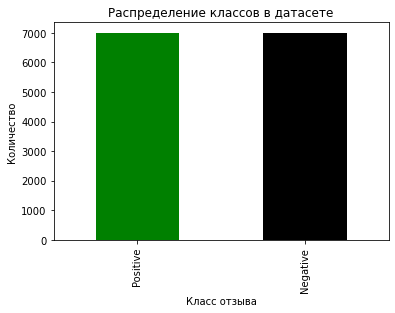

In [30]:
# проверка баланс классов в обучающей выборке

import matplotlib.pyplot as plt  

# Считаем количество положительных и отрицательных отзывов
reviews["Score"].value_counts().plot(kind="bar", color=["green", "black"])
plt.title("Распределение классов в датасете")
plt.xlabel("Класс отзыва")
plt.ylabel("Количество")
plt.show()

Классы сбалансированы, проверяем дальше.

In [31]:
# Вывод примеров после очистки текста, чтобы убедиться, что они не теряют смысл:
print(reviews["clean_text"].head(10))  # Проверяем, как выглядят очищенные отзывы

0    альфабанка работать замечательный девушка илья...
1    оформлять рассрочка м видео мег тёплый стан по...
2    очень порадовать оперативность работа банк зак...
3    иметь неосторожность оформить потреба кредит а...
4    небольшой предыстория найти сайт банк интересн...
5    конец февраль оформить кредитный карта банк ав...
6    месяц назад взять автокредит ходить разный сал...
7    говорить махинация бонус остановиться процент ...
8    день добрый мама сон вага рождение пенсионерка...
9    приветствуевать являться клиент чудобанка дого...
Name: clean_text, dtype: object


Отзывы достаточно длинные. Проверяем дальше

In [32]:
# Замена predict() на predict_proba(), чтобы учитывать уверенность модели:

# 2. Функция для предсказания тональности нового отзыва
def predict_sentiment_proba(review_text):
    #Определяет тональность введённого отзыва (положительный/отрицательный)
    
    # Загружаем модель и векторизатор
    with open("nb_model.pkl", "rb") as model_file:
        loaded_model = pickle.load(model_file)
    with open("tfidf_vectorizer.pkl", "rb") as vec_file:
        loaded_vectorizer = pickle.load(vec_file)
    
    # Предобработка текста (по аналогии с обработкой в основном коде)
    review_clean = clean_text(review_text)  # Используем твою функцию очистки текста
    
    # Преобразуем в TF-IDF
    review_tfidf = loaded_vectorizer.transform([review_clean])
    
    # Делаем предсказание
    prediction = loaded_model.predict_proba(review_tfidf)[0]
    
    return "Positive" if prediction == 1 else "Negative"

In [36]:
# Вводим отзыв через input()
user_review = input("Введите отзыв о банке: ")
print("Результат анализа:", predict_sentiment(user_review))

Введите отзыв о банке: Хороший банк
Результат анализа: Negative


Модель продолжает индентифицировать положительные отзывы как отрицательные. Попробуем заменить Байеса на логическую регрессию.

In [37]:
from sklearn.linear_model import LogisticRegression

# Обучение логистической регрессии
log_reg_model = LogisticRegression(max_iter=500, C=1, penalty='l2', solver='liblinear')
log_reg_model.fit(X_train, y_train)

# Оценка модели
y_pred = log_reg_model.predict(X_test)
print(f"Точность модели: {accuracy_score(y_test, y_pred):.2f}")

Точность модели: 0.94


In [38]:
# Сохранение модели и векторизатора
with open("logreg_model.pkl", "wb") as model_file:
    pickle.dump(log_reg_model, model_file)

with open("tfidf_vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)

In [39]:
# Применение модели для предсказания тональности нового отзыва

# Функция для анализа тональности нового отзыва
def predict_sentiment(review_text):
    """Определяет тональность введённого отзыва (положительный/отрицательный)"""
    
    # Загружаем модель и векторизатор
    with open("logreg_model.pkl", "rb") as model_file:
        loaded_model = pickle.load(model_file)
    with open("tfidf_vectorizer.pkl", "rb") as vec_file:
        loaded_vectorizer = pickle.load(vec_file)
    
    # Предобработка текста
    review_clean = clean_text(review_text)  # Функция очистки текста
    
    # Преобразуем в TF-IDF
    review_tfidf = loaded_vectorizer.transform([review_clean])
    
    # Делаем предсказание
    prediction = loaded_model.predict(review_tfidf)[0]
    
    return "Positive" if prediction == 1 else "Negative"

In [40]:
# Ввод отзыва
user_review = input("Введите отзыв о банке: ")
print("Результат анализа:", predict_sentiment(user_review))

Введите отзыв о банке: Лолка
Результат анализа: Negative


In [41]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(class_weight="balanced")
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print(f"Точность модели: {accuracy_score(y_test, y_pred):.2f}")

Точность модели: 0.94


Модель продолжает определять позитивные отзывы как негативные. Не успех.

# 6. Выделение ключевых тем (Topic Modeling) с использованием LDA